In this tutorial, you will learn the basics of how to deploy your deep learning models as web applications using some modern frameworks and libraries. In this tutorial, you will learn to:

- Serve web pages with Flask

- Apply the MVVM design pattern to write maintainable code

- Create an interactive UI for your service

- Deploy your deep learning models as a REST API

- Deploying your application on Heroku



## Install Dependencies

In [ ]:
# # @title Install dependencies
# !pip install --upgrade jupyter-client --quiet
# !pip install Flask-RESTful flasgger pyngrok --quiet

## Setup ngrok
In order to be able to access the web app running in the notebook, we need to use a service called `ngrok`. Since recently, `ngrok` requires the user to register for a free account and setup an authentication token. Follow the steps below to set it up.

- Go to [ngrok](https://ngrok.com/) and create a free account. Do not forget to verify your e-mail address right after!

- Go to [ngrok dashboard](https://dashboard.ngrok.com/get-started/your-authtoken) and copy your authtoken.

- Paste it in the cell below by replacing `YOUR_NGROK_AUTHTOKEN`, uncomment the last line and run it.

You should see this output:

`Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml`

**Note:** If you want to delete at some point your account, visit this page here and at the bottom of the page click on [Delete User](https://dashboard.ngrok.com/user/settings).

In [9]:
# Paste your ngrok authtoken below and run the cell
!ngrok authtoken 2uHJ0LPA7wLhDx7LPboLoN98Hv3_51V29EYTfgA4pHSpHs36Q

Authtoken saved to configuration file: /Users/shafinsaapel/Library/Application Support/ngrok/ngrok.yml


## Deploying Neural Networks on the Web

In this session, we will focus on the practical aspects of deploying neural networks, especially for web applications. While many online resources emphasize neural network architectures and optimization methods, the end goal is always to provide a fast, reliable application that meets user needs.

The tutorial will cover essential concepts, starting with Flask as a web application server and the Model-View-ViewModel (MVVM) design pattern for creating maintainable code. We will also explore REST APIs—crucial for deploying machine learning models—and learn how to build an interactive user interface for our applications. The highlight will be integrating a PyTorch model into our application and finally deploying it on Heroku, a platform that provides necessary scalability for production-grade applications.

**Highlights**
🧠 **Understanding Deployment**: Focus on the practical aspects of deploying AI models rather than just architecture.

🌐 **Web Application Server**: Introduction to Flask as the server framework for deploying models.

🏗️ **MVVM Design Pattern**: Learn the importance of the MVVM pattern in writing maintainable code.

🔗 **REST APIs**: Discuss the role of REST APIs in the deployment of machine learning models.

🎨 **User Interface Creation**: Steps to create an interactive user interface for the application.

📦 **Integrating PyTorch Models**: Techniques for incorporating PyTorch models into web applications.

🚀 **Deployment on Heroku**: Guide to deploying your service on Heroku for scalability and production readiness.

**Key Insights**

🌍 **The Importance of Application Context:** It’s vital to shift focus from the technical depth of neural networks to how the application performs in real-world settings. Customers prioritize functionality and usability over underlying complexity.

**In-depth analysis:** Engineers and developers often get bogged down in the theoretical aspects of neural networks, neglecting the importance of creating applications that are user-friendly and reliable. This tutorial centers on practical deployment, ensuring that everyone benefits from the power of neural networks without being experts in their complex workings.

🛠️ **Flask as a Foundation:** Flask serves as an elegant web application server that simplifies the deployment process for machine learning models.

**In-depth analysis:** Flask is lightweight and easy to set up, which makes it an ideal choice for those looking to deploy models quickly. The framework allows developers to route URLs and build simple APIs that can serve predictions from a trained networking model.

📏 **Model-View-ViewModel for Maintainability**: Integrating the MVVM design pattern allows developers to create applications that are easier to maintain and extend over time.

**In-depth analysis:** This design pattern separates the business logic from the user interface, allowing for cleaner code and simpler updates. With machine learning applications, where changes to models can happen frequently, having a well-structured codebase is essential for long-term development.

🔄 **REST APIs as Communication Bridges**: REST APIs facilitate communication between the web server and the machine learning model, enabling seamless interactions.

**In-depth analysis**: By using REST APIs, applications can efficiently send requests and receive responses, translating user interactions into model predictions. Understanding how to create and handle these APIs is crucial for any web deployment involving machine learning.

🎉 **Interactive User Interfaces**: Developing an intuitive user interface promotes better user engagement and satisfaction.

**In-depth analysis**: A well-designed user interface not only enhances the user experience but also provides avenues for users to interact meaningfully with AI predictions. This is especially important in applications where end-users may not be technically savvy.

📚 **Integrating PyTorch Models**: Learning how to incorporate PyTorch models into the web application allows developers to utilize one of the most popular machine learning frameworks seamlessly.

**In-depth analysis**: PyTorch is favored for its flexibility and dynamic computation graph, making it easier to implement complex models. Understanding how to properly load and serve these models in a web application environment is crucial for real-world deployments.

♻️ **Heroku for Scalability**: Leveraging Heroku for deployment provides a scalable solution tailored for web applications.

**In-depth analysis**: Heroku takes away much of the infrastructure hassle, allowing developers to focus on the application itself. The platform supports automatic scaling, which is particularly beneficial for machine learning applications, where resource demands can fluctuate dramatically depending on user interaction and model complexity.

In conclusion, this tutorial lays a strong foundation for anyone looking to deploy neural networks in a web environment. By shifting the focus from complex architectures to practical implementation, you’ll gain valuable insights that can enhance your projects and make machine learning accessible to broader audiences. Exploring tools like Flask, becoming familiar with design patterns, and understanding REST APIs are critical steps for anyone venturing into this rewarding domain.

## Flask
Flask is a web application micro-framework built with Python. Flask is popular because it’s lightweight, easy to use, scalable, and has tons of great extensions. 

Nowadays, Flask is used for many different applications like web applications, REST APIs, socket-based services, and by companies like LinkedIn or Pinterest.

In this section, you will learn to create simple Flask websites.

Creating a minimal Flask app is very simple. You need to create a `Flask` object and define the handler for the root URL returning the HTML response. You need to provide the applications module or package, but we can use `__name__` as a convenient shortcut.

We need one small trick because the app will be running in a notebook. If you just run the app, it will be accessible at `http://127.0.0.1:5000`. The problem is that this is a local address to the server where the notebook is running, so you can’t access it. This is where `ngrok` helps - it creates a tunnel from the notebook server to the outside world. Make sure you use the ngrok URL when testing your app.

Uncommenting the `app.run()` command below, you will see this output:

```
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   WARNING: This is a development server. Do not use it in a production deployment.
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Running on https://XXX-XX-XX-XXX-XXX.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
```
`The URL you have to visit is: https://XXX-XX-XX-XXX-XXX.ngrok.io`

**Note**: the call to `app.run()` will not return on its own. Make sure to `stop` the running cell when you want to move to the next one. You can do this by either clicking on the cell `run/stop button` or through `settings>Interrupt runtime or Ctrl+M+I`.

**Warning**: if the `“visit site”` option is not working, check the URL. `ngrok` redirects some links from `https` to `http`, so you have to manually make the change!

In [11]:
# Imports
import io
import platform
from PIL import Image
from urllib.request import urlopen

import flasgger
from flask_restful import Api
from flask_restful import Resource, fields, marshal
from flask import Flask, render_template_string, request, redirect
# from flask_ngrok import run_with_ngrok 

import torch
from torchvision import models
import torchvision.transforms as transforms

In [12]:
# # Create Flask app
# app = Flask(__name__)

# @app.route("/")
# def home():
#     """Root URL handler."""
#     return "<h1>Welcome to Neuromatch</h1>"

# # Run the Flask app with ngrok
# # run_with_ngrok(app)

# # Start the app
# app.run()

In [13]:
# Jinja2 HTML template
template_str = '''
<html lang="en">
    <body>
        <div style="width: 50%; margin: 100px auto">
            <h1>Platform Info</h1>
            <table>
                <tr style="width:">
                    <th style="width: 200px">Property</th>
                    <th>Value</th>
                </tr>

                {% for key, value in platform.items() %}
                <tr>
                    <td style="width: 200px">{{ key }}</td>
                    <td>{{ value }}</td>
                </tr>
                {% endfor %}

            </table>
        </div>
    </body>
</html>
'''

In [14]:
# app = Flask(__name__)

# @app.route("/")
# def home():
#   # Get the platform properties as a dict
#   properties = platform.uname()._asdict()

#   # Render the Jinja2 template
#   return render_template_string(template_str, platform=properties)


# # run_with_ngrok(app)

# ## Uncomment below to run the app
# app.run()

In [15]:
class PointModel:
    """
    Simple point Model storing a 2D point
    """
    
    # Initialize a 2D point
    def __init__(self, x, y):
        self.x = x
        self.y = y


class PointView(Resource):
    """
    Simple View displaying the information about a 2D point
    """

    def get(self):
        point = PointViewModel.get_sample_data()
        return f"Point: (x={point.x}, y={point.y})"


class PointViewModel:
    """
    ViewModel - Simple ViewModel retrieving the data and passing it to the view
    """

    # Create some sample data
    @classmethod
    def get_sample_data(cls):
        return PointModel(2, 5)

    # Register a handler for "/" in the API calling the PointView
    def setup(self, api):
        api.add_resource(PointView, '/')

In [16]:
# # Create a Flask app
# app = Flask(__name__)

# # Create an Api object where different ViewModels can be registered
# api = Api(app)

# # Create a PointViewModel and register it to the API
# pvm = PointViewModel()
# pvm.setup(api)

# # Run with ngrok
# # run_with_ngrok(app)

# ## Uncomment below to run the app
# app.run()

In [17]:
class PlatformView(Resource):
    """
    New view displaying some Platform Properties
    """
    
    def get(self):
        """
          This examples uses PlatformView Resource
          It works also with swag_from, schemas and spec_dict
          ---
          responses:
            200:
              description: A single Machine item
              schema:
                id: Machine
                properties:
                  machine:
                    type: string
                    description: The type of the processor
                    default: None
                  node:
                    type: string
                    description: The name of the current virtual machine
                    default: None
                  processor:
                    type: string
                    description: The type of the processor arch
                    default: None
                  system:
                    type: string
                    description: The name of the user
                    default: None
          """

        # Specification of the returned data
        resource_fields = {
            'system': fields.String,
            'machine': fields.String,
            'processor': fields.String,
            'node': fields.String
        }

        # Serialize the data according to the specification
        return marshal(platform.uname()._asdict(), resource_fields)


class PlatformViewModel:
    """
    A simple ViewModel that displays the PlatformView at /platform
    """
    
    def setup(self, api):
        api.add_resource(PlatformView, '/platform')

In [18]:
# # Create the Flask app and register the ViewModel
# app = Flask(__name__)
# api = Api(app)
# pvm = PlatformViewModel()
# pvm.setup(api)

# # Redirect / to /platform for convenience
# @app.route('/')
# def redirect_platform():
#   return redirect("/platform", code=302)


# # Register Swagger to create API documentation at /apidocs
# swg = flasgger.Swagger(app)

# # Run the app
# # run_with_ngrok(app)

# ## Uncomment below to run the app
# app.run()

In [19]:
vue_template = """
<html>
    <head>
        <script src="https://cdn.jsdelivr.net/npm/vue/dist/vue.js"></script>
        <script src="https://cdnjs.cloudflare.com/ajax/libs/axios/0.21.1/axios.min.js"></script>
    </head>
    <body>

        <div id="app">
            <ul>
                <li><strong>System:    </strong>{{ platform.system }}</li>
                <li><strong>Machine:   </strong>{{ platform.machine }}</li>
                <li><strong>Processor: </strong>{{ platform.processor }}</li>
                <li><strong>Node:      </strong>{{ platform.node }}</li>
            </ul>
        </div>

        <script >
            var app = new Vue({
                el: '#app',
                data() {
                    return {
                        platform: null
                    }
                },
                mounted () {
                    axios.get('/platform')
                      .then(response => (this.platform = response.data))
                }
            });
        </script>

    </body>
</html>
"""

In [21]:
# # Create the Flask app with the previously defined platform API
# app = Flask(__name__)
# api = Api(app)
# # Serve the Platform REST API
# pvm = PlatformViewModel()
# pvm.setup(api)
# swg = flasgger.Swagger(app)

# # Serve the Vue template page at /
# @app.route("/")
# def home():
#   return vue_template


# # Run the app
# # run_with_ngrok(app)

# ## Uncomment below to run the app
# app.run()

In [22]:
# Load a pre-trainied DenseNet model from torchvision.models
model = models.densenet121(pretrained=True)

# Switch the model to evaluation mode
model.eval()

# Load the class labels from a file
class_labels_url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
class_labels = urlopen(class_labels_url).read().decode("utf-8").split("\n")

# Define the transformation of the input image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

/Users/shafinsaapel/tensorflow-test/env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shafinsaapel/tensorflow-test/env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
def predict(model, transform, image, class_labels):
  # Transform the image and convert it to a tensor
  image_tensor = transform(image).unsqueeze(0)

  # Pass the image through the model
  with torch.no_grad():
    output = model(image_tensor)

  # Select the class with the higherst probability and look up the name
  class_id = torch.argmax(output).item()
  class_name = class_labels[class_id]

  # Return the class name
  return class_name

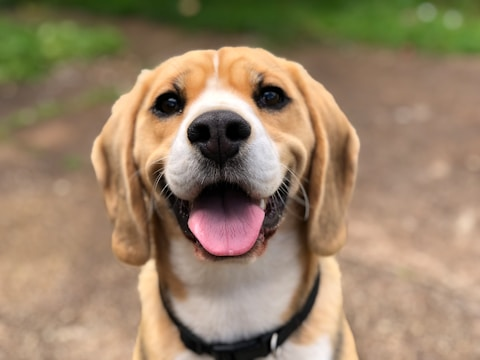

'English foxhound'

In [24]:
# Load and display the image
dog_image = Image.open(io.BytesIO(urlopen("https://unsplash.com/photos/2l0CWTpcChI/download?force=true&w=480").read()))
display(dog_image)

# Classify the image
display(predict(model, transform, dog_image, class_labels))

In [25]:
index_template = """
<html>
    <head>
        <!-- Load vue.js and axois.js -->
        <script src="https://cdn.jsdelivr.net/npm/vue/dist/vue.js"></script>
        <script src="https://cdnjs.cloudflare.com/ajax/libs/axios/0.21.1/axios.min.js"></script>
    </head>
    <body>
        <!-- The APP UI -->
        <div id="app" style="width: 50%; margin: 200px auto">
            <form id="imageForm" enctype="multipart/form-data" method="POST" style="text-align: center; display: block">
                <label for="imageFile">Select image to classify:</label
                ><input id="imageFile" name="file" type="file" style="margin-left: 10px" />

                <img v-if="image" :src="image" style="width: 250px; display: block; margin: 50px auto 10px" />
                <div v-if="prediction" style="font-size: 32px; font-weight: bold; text-align: center">
                    {{ prediction }}
                </div>
                <input v-if="image" type="submit" value="Classify Image" style="margin: 20px 20px" />
            </form>
        </div>

        <script>
            <!-- The Vue application -->
            var app = new Vue({
                el: "#app",
                data() {
                    return {
                        image: null,
                        prediction: null,
                    };
                },
            });

            <!-- Calling the predict API when the form is submitted -->
            document.getElementById("imageForm").addEventListener("submit", (e) => {
                axios
                    .post("/predict", new FormData(document.getElementById("imageForm")), {
                        headers: {
                            "Content-Type": "multipart/form-data",
                        },
                    })
                    .then((response) => (app.prediction = response.data));

                e.preventDefault();
            });

            <!-- Display the selected image -->
            document.getElementById("imageFile").addEventListener("change", (e) => {
                const [file] = document.getElementById("imageFile").files;
                if (file) {
                    app.image = URL.createObjectURL(file);
                }
            });
        </script>
    </body>
</html>
"""

In [27]:
app = Flask(__name__)

# Serve the Vue template with the interactive UI
@app.route("/")
def home():
  return index_template


# Classification API
@app.route("/predict", methods=['POST'])
def predict_api():
  # Fetch the image from the request and convert it to a Pillow image
  image_file = request.files['file']
  image_bytes = image_file.read()
  image = Image.open(io.BytesIO(image_bytes))

  # Predict the class from the image
  class_name = predict(model, transform, image, class_labels)

  # Return the result
  return class_name


# Run the app
# run_with_ngrok(app)

## Uncomment below to run the app
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [14/Mar/2025 05:33:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2025 05:33:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2025 05:33:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2025 05:33:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2025 05:33:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2025 05:33:38] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2025 05:33:52] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2025 05:34:23] "POST /predict HTTP/1.1" 200 -
